In [5]:
import pandas as pd
import json
import ast
import warnings
from ast import literal_eval as le

warnings.filterwarnings("ignore")
import requests
import pandas as pd
import urlexpander


def unshorten(url):
    if "http" not in url:
        url = "http://" + url

    try:
        short = urlexpander.expand(url)
    except:
        short = url

    if "_ERROR__" in short:
        return url
    else:
        return short


def one_url_df(df, column="n_urls", urls="urls"):
    df = df[df[column] == 1]
    df[urls] = df[urls].apply(lambda x: x[0])
    return df


def more_url_df(df, interaction, n="n_urls", urls="urls"):
    df = df[df[n] > 1]
    temp = []
    for i in df.iterrows():

        row = i[1].to_dict()
        for url in row[urls]:
            temp.append((url, row[interaction], row[n]))
    return (
        pd.DataFrame(temp)
        .drop_duplicates()
        .rename(columns={0: urls, 1: interaction, 2: n})
    )

In [6]:
data_path = "../../URLs_Data_Filteration/Youtube/"

In [7]:
ls "../../URLs_Data_Filteration/Youtube"

 Volume in drive G is Essentials
 Volume Serial Number is 7063-374D

 Directory of G:\Freelance\Christina\URLs_Data_Filteration\Youtube

01/30/2022  01:42 PM    <DIR>          .
01/30/2022  01:42 PM    <DIR>          ..
01/19/2022  10:58 AM         2,735,132 df_comments_4_months_urls.csv
01/19/2022  10:58 AM            34,044 df_comments_4_months_urls_1_link.csv
01/19/2022  10:58 AM             6,974 df_comments_4_months_urls_more.csv
01/19/2022  10:58 AM           780,678 df_comments_dec_urls.csv
01/19/2022  10:58 AM            22,802 df_comments_dec_urls_1_link.csv
01/19/2022  10:58 AM             6,732 df_comments_dec_urls_more.csv
01/19/2022  09:54 AM         2,635,949 df_videos_4_months_urls.csv
01/19/2022  10:58 AM             2,798 df_videos_4_months_urls_1_link.csv
01/19/2022  10:58 AM            72,940 df_videos_4_months_urls_more.csv
01/19/2022  10:58 AM         2,136,554 df_videos_dec_urls.csv
01/19/2022  10:58 AM             2,408 df_videos_dec_urls_1_link.csv
01/19/2022  1

# Comments

## 4 Months

In [4]:
df_comments_4_months_urls = pd.read_csv(data_path + "df_comments_4_months_urls.csv")

In [5]:
df_comments_4_months_urls.head(1)

,Unnamed: 0,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,...,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus,urls,n_urls
0,246.0,youtube#commentThread,qdoqrw3cE0__VDupjhlNX__WB70,UgzMkTI7AmxUZWcWj5B4AaABAg,QBCEXSVjBrM,youtube#comment,A_cfWgYhmBQ9QUCuztUvQz2_KWg,UgzMkTI7AmxUZWcWj5B4AaABAg,QBCEXSVjBrM,"<a href=""https://youtu.be/mw3IiyXZJds"">https:/...",...,0.0,2021-02-03 16:34:18+00:00,2021-02-03T16:34:18Z,True,0.0,True,NaN,NaN,['https://youtu.be/mw3IiyXZJds'],1


In [6]:
df_comments_4_months_urls.columns

Index(['Unnamed: 0', 'kind', 'etag', 'id', 'snippet.videoId',
       'snippet.topLevelComment.kind', 'snippet.topLevelComment.etag',
       'snippet.topLevelComment.id', 'snippet.topLevelComment.snippet.videoId',
       'snippet.topLevelComment.snippet.textDisplay',
       'snippet.topLevelComment.snippet.textOriginal',
       'snippet.topLevelComment.snippet.authorDisplayName',
       'snippet.topLevelComment.snippet.authorProfileImageUrl',
       'snippet.topLevelComment.snippet.authorChannelUrl',
       'snippet.topLevelComment.snippet.authorChannelId.value',
       'snippet.topLevelComment.snippet.canRate',
       'snippet.topLevelComment.snippet.viewerRating',
       'snippet.topLevelComment.snippet.likeCount',
       'snippet.topLevelComment.snippet.publishedAt',
       'snippet.topLevelComment.snippet.updatedAt', 'snippet.canReply',
       'snippet.totalReplyCount', 'snippet.isPublic', 'replies.comments',
       'snippet.topLevelComment.snippet.moderationStatus', 'urls', 'n_urls

In [7]:
df_comments_4_months_urls.rename(
    columns={
        "snippet.topLevelComment.snippet.likeCount": "n_likes",
        "snippet.totalReplyCount": "n_replies",
    },
    inplace=True,
)

### Likes

In [8]:
df_comments_4_months_urls.n_likes.describe()

count    1065.000000
mean        8.918310
std        76.149486
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max      2174.000000
Name: n_likes, dtype: float64

In [9]:
df_comments_4_months_urls.n_likes.mean()

8.91830985915493

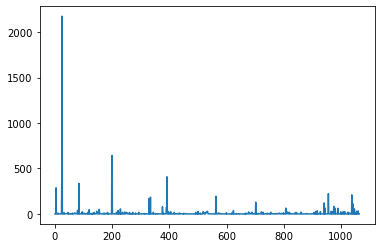

In [10]:
df_comments_4_months_urls.n_likes.plot();

In [11]:
df_comments_4_months_urls.shape[0]

1065

In [12]:
df_comments_4_months_urls_top_likes = df_comments_4_months_urls[df_comments_4_months_urls.n_likes > 0]

In [13]:
df_comments_4_months_urls_top_likes.sort_values("n_likes", ascending=False, inplace=True)

In [14]:
df_comments_4_months_urls_top_likes[["urls", "n_likes"]][~df_comments_4_months_urls_top_likes[["urls", "n_likes"]].duplicated()]

,urls,n_likes
25,['https://youtu.be/Axcjv9YqYns'],2174.0
200,['https://youtu.be/dJe8bl_BLDE'],644.0
199,['https://ko-fi.com/irisbabilonia'],509.0
24,['https://www.change.org/p/dc-entertainment-re...,409.0
392,['https://www.youtube.com/watch?v=xCe6qh5kZ8Q'],408.0
...,...,...
448,['https://youtu.be/bZB7ThLyqUI'],1.0
485,['https://youtu.be/4I89OaDq5Zg'],1.0
477,['https://youtu.be/_IHmrsTqmmo'],1.0
453,['https://youtube.com/channel/UCRcoEhdSF5Lrf6R...,1.0


In [15]:
df_comments_4_months_urls_top_likes = df_comments_4_months_urls_top_likes[
    ["urls", "n_likes"]
][~df_comments_4_months_urls_top_likes[["urls", "n_likes"]].duplicated()]

In [16]:
df_comments_4_months_urls_top_likes["n_urls"] = df_comments_4_months_urls_top_likes.urls.apply(lambda x: len(le(x)))
df_comments_4_months_urls_top_likes["urls"] = df_comments_4_months_urls_top_likes.urls.apply(lambda x: le(x))

In [17]:
df_comments_4_months_urls_top_likes.head(2)

,urls,n_likes,n_urls
25,[https://youtu.be/Axcjv9YqYns],2174.0,1
200,[https://youtu.be/dJe8bl_BLDE],644.0,1


In [18]:
df_comments_4_months_urls_top_likes_one = df_comments_4_months_urls_top_likes[df_comments_4_months_urls_top_likes.n_urls == 1]

In [19]:
df_comments_4_months_urls_top_likes_one["urls"] = df_comments_4_months_urls_top_likes_one["urls"].apply(lambda x: x[0])

In [21]:
df_comments_4_months_urls_top_likes_one.head(2)

,urls,n_likes,n_urls
25,https://youtu.be/Axcjv9YqYns,2174.0,1
200,https://youtu.be/dJe8bl_BLDE,644.0,1


In [22]:
df_comments_4_months_urls_top_likes_more = df_comments_4_months_urls_top_likes[df_comments_4_months_urls_top_likes.n_urls > 1]

In [23]:
list_comments_4_months_urls_top_likes_more = []
for i in df_comments_4_months_urls_top_likes_more.iterrows():
    row = i[1].to_dict()
    for url in row["urls"]:
        list_comments_4_months_urls_top_likes_more.append(
            (url, row["n_likes"], row["n_urls"])
        )

In [24]:
list_comments_4_months_urls_top_likes_more

[('https://www.bit.ly/valenentropia', 210.0, 2),
 ('https://www.bit.ly/valenentropia', 210.0, 2),
 ('https://t.co/yWkf2d2APp?amp=1', 111.0, 7),
 ('https://referral.rumble.com/dszVtP5hNXYLXqL89', 111.0, 7),
 ('https://www.youtube.com/channel/UCt4dtZ67qO3xWQSImQjRnJA', 111.0, 7),
 ('https://www.bitchute.com/channel/a3WbPaAzRKWN/', 111.0, 7),
 ('https://www.youtube.com/channel/UC8AGq7bm-x4teGcvQonvnPw/join', 111.0, 7),
 ('https://www.patreon.com/user?u=21542407', 111.0, 7),
 ('https://www.subscribestar.com/nerdettesnewsstand', 111.0, 7),
 ('https://lbry.tv/@NerdettesNewsStand:7', 66.0, 7),
 ('https://referral.rumble.com/dszVtP5hNXYLXqL89', 66.0, 7),
 ('https://www.youtube.com/channel/UCt4dtZ67qO3xWQSImQjRnJA', 66.0, 7),
 ('https://www.bitchute.com/channel/a3WbPaAzRKWN/', 66.0, 7),
 ('https://www.youtube.com/channel/UC8AGq7bm-x4teGcvQonvnPw/join', 66.0, 7),
 ('https://www.patreon.com/user?u=21542407', 66.0, 7),
 ('https://www.subscribestar.com/nerdettesnewsstand', 66.0, 7),
 ('https://lbry

In [25]:
df_comments_4_months_urls_top_likes_more = (
    pd.DataFrame(list_comments_4_months_urls_top_likes_more)
    .drop_duplicates()
    .rename(columns={0: "url", 1: "n_likes", 2: "n_urls"})
)

In [26]:
df_comments_4_months_urls_top_likes_more

,url,n_likes,n_urls
0,https://www.bit.ly/valenentropia,210.0,2
2,https://t.co/yWkf2d2APp?amp=1,111.0,7
3,https://referral.rumble.com/dszVtP5hNXYLXqL89,111.0,7
4,https://www.youtube.com/channel/UCt4dtZ67qO3xW...,111.0,7
5,https://www.bitchute.com/channel/a3WbPaAzRKWN/,111.0,7
...,...,...,...
198,https://www.youtube.com/watch?v=Cg9SvQSMnoE,1.0,5
200,https://www.youtube.com/watch?v=HwKB80xZdus,1.0,5
201,https://www.youtube.com/watch?v=V7lg69VFSY8,1.0,5
202,https://www.standard.co.uk/news/uk/johnny-depp...,1.0,2


In [28]:
df_comments_4_months_urls_top_likes_one[
    "original_url"
] = df_comments_4_months_urls_top_likes_one.urls.apply(lambda x: unshorten(x))

In [29]:
df_comments_4_months_urls_top_likes_one = df_comments_4_months_urls_top_likes_one.drop(
    columns="urls"
).rename(columns={"original_url": "url"})[["url", "n_likes", "n_urls"]]

In [30]:
df_comments_4_months_urls_top_likes_one = df_comments_4_months_urls_top_likes_one.reset_index(drop=True)

In [27]:
yt_path = "../../Top Interacted/Youtube/"

In [32]:
df_comments_4_months_urls_top_likes_one

,url,n_likes,n_urls
0,https://www.youtube.com/watch?v=Axcjv9YqYns&fe...,2174.0,1
1,https://www.youtube.com/watch?v=dJe8bl_BLDE&fe...,644.0,1
2,https://ko-fi.com/irisbabilonia,509.0,1
3,https://www.change.org/p/dc-entertainment-remo...,409.0,1
4,https://www.youtube.com/watch?v=xCe6qh5kZ8Q,408.0,1
...,...,...,...
344,https://www.youtube.com/watch?v=bZB7ThLyqUI&fe...,1.0,1
345,https://www.youtube.com/watch?v=4I89OaDq5Zg&fe...,1.0,1
346,https://www.youtube.com/watch?v=_IHmrsTqmmo&fe...,1.0,1
347,https://www.youtube.com/channel/UCRcoEhdSF5Lrf...,1.0,1


In [33]:
df_comments_4_months_urls_top_likes_one.to_csv(
    yt_path + "df_comments_4_months_urls_top_likes_one.csv", index=False
)

In [34]:
df_comments_4_months_urls_top_likes_more[
    "url"
] = df_comments_4_months_urls_top_likes_more["url"].apply(lambda x: unshorten(x))

In [35]:
df_comments_4_months_urls_top_likes_more

,url,n_likes,n_urls
0,https://brave.com/?ref=los517/,210.0,2
2,https://odysee.com/@Nerdettesnewsstand:4?r=EAd...,111.0,7
3,https://rumble.com/register/NerdettesNewsStand...,111.0,7
4,https://www.youtube.com/channel/UCt4dtZ67qO3xW...,111.0,7
5,https://www.bitchute.com/channel/a3WbPaAzRKWN/,111.0,7
...,...,...,...
198,https://www.youtube.com/watch?v=Cg9SvQSMnoE,1.0,5
200,https://www.youtube.com/watch?v=HwKB80xZdus,1.0,5
201,https://www.youtube.com/watch?v=V7lg69VFSY8,1.0,5
202,https://www.standard.co.uk/news/uk/johnny-depp...,1.0,2


In [36]:
df_comments_4_months_urls_top_likes_more.to_csv(
    yt_path + "df_comments_4_months_urls_top_likes_more.csv", index=False
)

In [37]:
df_comments_4_months_urls_top_likes = (
    pd.concat(
        [
            df_comments_4_months_urls_top_likes_one,
            df_comments_4_months_urls_top_likes_more,
        ]
    )
    .reset_index(drop=True)
    .sort_values("n_likes", ascending=False)
)

In [38]:
df_comments_4_months_urls_top_likes.to_csv(
    yt_path + "df_comments_4_months_urls_top_likes.csv", index=False
)

### replies

In [39]:
df_comments_4_months_urls.n_replies.describe()

count    1065.000000
mean        1.059155
std         8.455616
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       175.000000
Name: n_replies, dtype: float64

In [40]:
df_comments_4_months_urls_top_replies = df_comments_4_months_urls[df_comments_4_months_urls.n_replies > 0]

In [41]:
df_comments_4_months_urls_top_replies.sort_values("n_replies", ascending=False, inplace=True)

In [42]:
df_comments_4_months_urls_top_replies[["urls", "n_replies"]][~df_comments_4_months_urls_top_replies[["urls", "n_replies"]].duplicated()]

,urls,n_replies
96,"['https://t.co/yWkf2d2APp?amp=1', 'https://ref...",175.0
392,['https://www.youtube.com/watch?v=xCe6qh5kZ8Q'],159.0
25,['https://youtu.be/Axcjv9YqYns'],82.0
917,"['https://lbry.tv/@NerdettesNewsStand:7', 'htt...",56.0
941,['https://thld.co/SHEATH_thequartering'],41.0
...,...,...
399,['https://youtu.be/ouyqNwV1OBA'],1.0
391,['https://www.rollingstone.com/tv/tv-features/...,1.0
362,['https://www.sausageroll.com.au/lifestyle/cel...,1.0
322,['https://g.co/kgs/ou1RKq'],1.0


In [43]:
df_comments_4_months_urls_top_replies = df_comments_4_months_urls_top_replies[
    ["urls", "n_replies"]
][~df_comments_4_months_urls_top_replies[["urls", "n_replies"]].duplicated()]

In [44]:
df_comments_4_months_urls_top_replies["urls"] = df_comments_4_months_urls_top_replies["urls"].apply(lambda x: le(x))

In [45]:
df_comments_4_months_urls_top_replies["urls"][96]

['https://t.co/yWkf2d2APp?amp=1',
 'https://referral.rumble.com/dszVtP5hNXYLXqL89',
 'https://www.youtube.com/channel/UCt4dtZ67qO3xWQSImQjRnJA',
 'https://www.bitchute.com/channel/a3WbPaAzRKWN/',
 'https://www.youtube.com/channel/UC8AGq7bm-x4teGcvQonvnPw/join',
 'https://www.patreon.com/user?u=21542407',
 'https://www.subscribestar.com/nerdettesnewsstand']

In [46]:
df_comments_4_months_urls_top_replies["n_urls"] = df_comments_4_months_urls_top_replies["urls"].apply(lambda x: len(x))

In [47]:
df_comments_4_months_urls_top_replies_one = one_url_df(df_comments_4_months_urls_top_replies)

In [48]:
df_comments_4_months_urls_top_replies_one

,urls,n_replies,n_urls
392,https://www.youtube.com/watch?v=xCe6qh5kZ8Q,159.0,1
25,https://youtu.be/Axcjv9YqYns,82.0,1
941,https://thld.co/SHEATH_thequartering,41.0,1
975,https://www.youtube.com/watch?v=nwgqEdiiNKo,36.0,1
199,https://ko-fi.com/irisbabilonia,35.0,1
...,...,...,...
399,https://youtu.be/ouyqNwV1OBA,1.0,1
391,https://www.rollingstone.com/tv/tv-features/ev...,1.0,1
362,https://www.sausageroll.com.au/lifestyle/celeb...,1.0,1
322,https://g.co/kgs/ou1RKq,1.0,1


In [49]:
df_comments_4_months_urls_top_replies_one[
    "urls"
] = df_comments_4_months_urls_top_replies_one["urls"].apply(lambda x: unshorten(x))

In [50]:
df_comments_4_months_urls_top_replies_one

,urls,n_replies,n_urls
392,https://www.youtube.com/watch?v=xCe6qh5kZ8Q,159.0,1
25,https://www.youtube.com/watch?v=Axcjv9YqYns&fe...,82.0,1
941,https://thld.co/SHEATH_thequartering,41.0,1
975,https://www.youtube.com/watch?v=nwgqEdiiNKo,36.0,1
199,https://ko-fi.com/irisbabilonia,35.0,1
...,...,...,...
399,https://www.youtube.com/watch?v=ouyqNwV1OBA&fe...,1.0,1
391,https://www.rollingstone.com/tv/tv-features/ev...,1.0,1
362,https://www.sausageroll.com.au/lifestyle/celeb...,1.0,1
322,https://www.google.com/search?kgmid=/m/01ydpv&...,1.0,1


In [51]:
df_comments_4_months_urls_top_replies_one.to_csv(
    yt_path + "df_comments_4_months_urls_top_replies_one.csv", index=False
)

In [53]:
df_comments_4_months_urls_top_replies_more = more_url_df(df_comments_4_months_urls_top_replies, "n_replies")

In [54]:
df_comments_4_months_urls_top_replies_more

,urls,n_replies,n_urls
0,https://t.co/yWkf2d2APp?amp=1,175.0,7
1,https://referral.rumble.com/dszVtP5hNXYLXqL89,175.0,7
2,https://www.youtube.com/channel/UCt4dtZ67qO3xW...,175.0,7
3,https://www.bitchute.com/channel/a3WbPaAzRKWN/,175.0,7
4,https://www.youtube.com/channel/UC8AGq7bm-x4te...,175.0,7
...,...,...,...
171,https://www.thegeekbuzz.com/the-basement/cyril...,1.0,5
172,https://www.thegeekbuzz.com/the-basement/dceu-...,1.0,5
173,https://www.ft.com/content/16b8cfb2-4934-4e88-...,1.0,5
174,https://www.youtube.com/watch?v=k9pbrBmHI58&t=...,1.0,2


In [55]:
df_comments_4_months_urls_top_replies_more[
    "urls"
] = df_comments_4_months_urls_top_replies_more["urls"].apply(lambda x: unshorten(x))

In [56]:
df_comments_4_months_urls_top_replies_more.to_csv(
    yt_path + "df_comments_4_months_urls_top_replies_more.csv", index=False
)

In [57]:
df_comments_4_months_urls_top_replies = pd.concat(
    [
        df_comments_4_months_urls_top_replies_one,
        df_comments_4_months_urls_top_replies_more,
    ]
)

In [58]:
df_comments_4_months_urls_top_replies

,urls,n_replies,n_urls
392,https://www.youtube.com/watch?v=xCe6qh5kZ8Q,159.0,1
25,https://www.youtube.com/watch?v=Axcjv9YqYns&fe...,82.0,1
941,https://thld.co/SHEATH_thequartering,41.0,1
975,https://www.youtube.com/watch?v=nwgqEdiiNKo,36.0,1
199,https://ko-fi.com/irisbabilonia,35.0,1
...,...,...,...
171,https://thegeekbuzz.com/the-basement/cyrillic-...,1.0,5
172,https://thegeekbuzz.com/the-basement/dceu-acto...,1.0,5
173,https://www.ft.com/content/16b8cfb2-4934-4e88-...,1.0,5
174,https://www.youtube.com/watch?v=k9pbrBmHI58&t=...,1.0,2


In [59]:
df_comments_4_months_urls_top_replies.drop_duplicates(inplace=True)

In [60]:
df_comments_4_months_urls_top_replies.to_csv(
    yt_path + "df_comments_4_months_urls_top_replies.csv", index=False
)

In [61]:
df_comments_4_months_urls_top_replies

,urls,n_replies,n_urls
392,https://www.youtube.com/watch?v=xCe6qh5kZ8Q,159.0,1
25,https://www.youtube.com/watch?v=Axcjv9YqYns&fe...,82.0,1
941,https://thld.co/SHEATH_thequartering,41.0,1
975,https://www.youtube.com/watch?v=nwgqEdiiNKo,36.0,1
199,https://ko-fi.com/irisbabilonia,35.0,1
...,...,...,...
171,https://thegeekbuzz.com/the-basement/cyrillic-...,1.0,5
172,https://thegeekbuzz.com/the-basement/dceu-acto...,1.0,5
173,https://www.ft.com/content/16b8cfb2-4934-4e88-...,1.0,5
174,https://www.youtube.com/watch?v=k9pbrBmHI58&t=...,1.0,2


##  dec

In [62]:
df_comments_dec_urls = pd.read_csv(data_path + "df_comments_dec_urls.csv")

In [63]:
df_comments_dec_urls.head(1)

,Unnamed: 0,kind,etag,id,snippet.videoId,snippet.topLevelComment.kind,snippet.topLevelComment.etag,snippet.topLevelComment.id,snippet.topLevelComment.snippet.videoId,snippet.topLevelComment.snippet.textDisplay,...,snippet.topLevelComment.snippet.likeCount,snippet.topLevelComment.snippet.publishedAt,snippet.topLevelComment.snippet.updatedAt,snippet.canReply,snippet.totalReplyCount,snippet.isPublic,replies.comments,snippet.topLevelComment.snippet.moderationStatus,urls,n_urls
0,45.0,youtube#commentThread,vrjHSvKbOnocmVhHX6Fcia0NPZU,Ugxe640u7xqHIhsJMal4AaABAg,8oNYOv4o8zM,youtube#comment,-Dlurk_GGOv0PcxR_VTAV_q2Dv4,Ugxe640u7xqHIhsJMal4AaABAg,8oNYOv4o8zM,Sign this petition to rid Amber Heard off AQUA...,...,0.0,2020-12-16 14:07:13+00:00,2020-12-16T14:07:13Z,True,0.0,True,NaN,NaN,"['http://chng.it/JDQLmRqM', 'http://chng.it/kD...",2


In [64]:
df_comments_dec_urls.rename(
    columns={
        "snippet.topLevelComment.snippet.likeCount": "n_likes",
        "snippet.totalReplyCount": "n_replies",
    },
    inplace=True,
)

### Likes

In [65]:
df_comments_dec_urls.n_likes.describe()

count    619.000000
mean       2.329564
std       22.083058
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max      441.000000
Name: n_likes, dtype: float64

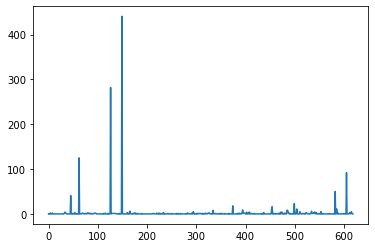

In [66]:
df_comments_dec_urls.n_likes.plot();

In [67]:
df_comments_dec_urls_top_likes = df_comments_dec_urls[df_comments_dec_urls.n_likes > 1]

In [68]:
df_comments_dec_urls_top_likes.sort_values("n_likes", ascending=False, inplace=True)

In [69]:
df_comments_dec_urls_top_likes = df_comments_dec_urls_top_likes[["urls", "n_likes"]][
    ~df_comments_dec_urls_top_likes[["urls", "n_likes"]].duplicated()
]

In [70]:
df_comments_dec_urls_top_likes['urls'] = df_comments_dec_urls_top_likes['urls'].apply(lambda x: le(x))

In [71]:
df_comments_dec_urls_top_likes['n_urls'] = df_comments_dec_urls_top_likes['urls'].apply(lambda x: len(x))

In [72]:
df_comments_dec_urls_top_likes

,urls,n_likes,n_urls
149,[https://www.change.org/p/dc-entertainment-rem...,441.0,1
126,[https://privateinternetaccess.com/TheQuarteri...,282.0,1
62,[https://displate.com/thequartering?art=5e0b6f...,125.0,1
605,[n.pr/support-the-tiny-desk],92.0,1
582,"[https://lbry.tv/@NerdettesNewsStand:7, https:...",50.0,7
...,...,...,...
319,[https://youtu.be/xFOFlPAaxOc],2.0,1
325,[https://youtu.be/LKMTHdQ4iQs],2.0,1
327,[https://youtu.be/AsHKe7fE3bY],2.0,1
387,[http://miniurl.es/quickdates7hotladyy/],2.0,1


In [73]:
df_comments_dec_urls_top_likes_one = one_url_df(df_comments_dec_urls_top_likes)

In [74]:
df_comments_dec_urls_top_likes_one["urls"] = df_comments_dec_urls_top_likes_one["urls"].apply(lambda x: unshorten(x))

In [75]:
df_comments_dec_urls_top_likes_one.drop_duplicates(inplace=True)

In [76]:
df_comments_dec_urls_top_likes_one.to_csv(
    yt_path + "df_comments_dec_urls_top_likes_one.csv", index=False
)

In [77]:
df_comments_dec_urls_top_likes_one_more = more_url_df(
    df_comments_dec_urls_top_likes, "n_likes"
)

In [78]:
df_comments_dec_urls_top_likes_one_more["urls"] = df_comments_dec_urls_top_likes_one_more["urls"].apply(lambda x: unshorten(x))

In [79]:
df_comments_dec_urls_top_likes_one_more.drop_duplicates(inplace=True)

In [80]:
df_comments_dec_urls_top_likes_one_more.to_csv(
    yt_path + "df_comments_dec_urls_top_likes_more.csv", index=False
)

In [81]:
pd.concat(
    [df_comments_dec_urls_top_likes_one, df_comments_dec_urls_top_likes_one_more]
).to_csv(yt_path + "df_comments_dec_urls_top_likes.csv", index=False)

### replies

In [82]:
df_comments_dec_urls.n_replies.describe()

count    619.000000
mean       0.245557
std        2.057693
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       40.000000
Name: n_replies, dtype: float64

<AxesSubplot:>

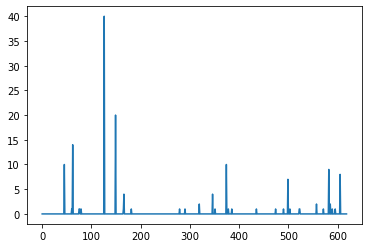

In [83]:
df_comments_dec_urls.n_replies.plot()

In [84]:
df_comments_dec_urls_top_replies = df_comments_dec_urls[df_comments_dec_urls.n_replies > 0]

In [85]:
df_comments_dec_urls_top_replies.sort_values("n_replies", ascending=False, inplace=True)

In [86]:
df_comments_dec_urls_top_replies[["urls", "n_replies"]][~df_comments_dec_urls_top_replies[["urls", "n_replies"]].duplicated()]

,urls,n_replies
126,['https://privateinternetaccess.com/TheQuarter...,40.0
149,['https://www.change.org/p/dc-entertainment-re...,20.0
62,['https://displate.com/thequartering?art=5e0b6...,14.0
45,"['https://lbry.tv/@NerdettesNewsStand:7', 'htt...",10.0
374,['https://mobile.twitter.com/LauraBockov?s=20'...,10.0
582,"['https://lbry.tv/@NerdettesNewsStand:7', 'htt...",9.0
605,['n.pr/support-the-tiny-desk'],8.0
499,"['https://lbry.tv/@NerdettesNewsStand:7', 'htt...",7.0
166,['https://www.google.com/url?sa=t&source=web&r...,4.0
346,['https://youtu.be/qIXxO7Of_Ow'],4.0


In [87]:
df_comments_dec_urls_top_replies = df_comments_dec_urls_top_replies[
    ["urls", "n_replies"]
][~df_comments_dec_urls_top_replies[["urls", "n_replies"]].duplicated()]

In [88]:
df_comments_dec_urls_top_replies["urls"] = df_comments_dec_urls_top_replies["urls"].apply(lambda x: le(x))
df_comments_dec_urls_top_replies["n_urls"] = df_comments_dec_urls_top_replies["urls"].apply(lambda x: len(x))

In [89]:
df_comments_dec_urls_top_replies_one = one_url_df(df_comments_dec_urls_top_replies)
df_comments_dec_urls_top_replies_more = more_url_df(df_comments_dec_urls_top_replies, "n_replies")

In [90]:
df_comments_dec_urls_top_replies_one["urls"] = df_comments_dec_urls_top_replies_one[
    "urls"
].apply(lambda x: unshorten(x))

df_comments_dec_urls_top_replies_more["urls"] = df_comments_dec_urls_top_replies_more[
    "urls"
].apply(lambda x: unshorten(x))

In [91]:
df_comments_dec_urls_top_replies_one.drop_duplicates(inplace=True)
df_comments_dec_urls_top_replies_more.drop_duplicates(inplace=True)

In [92]:
df_comments_dec_urls_top_replies_one.to_csv(
    yt_path + "df_comments_dec_urls_top_replies_one.csv", index=False
)

In [93]:
pd.concat(
    [df_comments_dec_urls_top_replies_one, df_comments_dec_urls_top_replies_more]
).to_csv(yt_path + "df_comments_dec_urls_top_replies.csv", index=False)

In [94]:
df_comments_dec_urls_top_replies_one

,urls,n_replies,n_urls
126,https://privateinternetaccess.com/TheQuarteringBF,40.0,1
149,https://www.change.org/p/dc-entertainment-remo...,20.0,1
62,https://displate.com/thequartering?art=5e0b6fe...,14.0,1
605,https://www.npr.org/donations/510306?utm_campa...,8.0,1
166,https://www.google.com/url?sa=t&source=web&rct...,4.0,1
346,https://www.youtube.com/watch?v=qIXxO7Of_Ow&fe...,4.0,1
319,https://www.youtube.com/watch?v=xFOFlPAaxOc&fe...,2.0,1
557,https://www.youtube.com/watch?v=GXMAQ59a-ss&t=6s,2.0,1
595,https://www.youtube.com/watch?v=QQUgzIh9vsw&fe...,1.0,1
589,https://www.youtube.com/watch?v=a_DQ_4i-iAs&fe...,1.0,1


In [95]:
df_comments_dec_urls_top_replies_more

,urls,n_replies,n_urls
0,https://odysee.com/@NerdettesNewsStand:7?&suns...,10.0,7
1,https://rumble.com/register/NerdettesNewsStand...,10.0,7
2,https://www.youtube.com/channel/UCt4dtZ67qO3xW...,10.0,7
3,https://www.bitchute.com/channel/a3WbPaAzRKWN/,10.0,7
4,https://www.youtube.com/channel/UC8AGq7bm-x4te...,10.0,7
...,...,...,...
72,https://twitter.com/PodcastNow15,1.0,6
73,https://variety.com/2018/biz/news/johnny-depp-...,1.0,4
74,https://www.dnaindia.com/hollywood/report-neve...,1.0,4
75,https://www.upi.com/Archives/1989/03/10/DEPP-S...,1.0,4


In [96]:
pd.concat([df_comments_dec_urls_top_replies_one, df_comments_dec_urls_top_replies_more])

,urls,n_replies,n_urls
126,https://privateinternetaccess.com/TheQuarteringBF,40.0,1
149,https://www.change.org/p/dc-entertainment-remo...,20.0,1
62,https://displate.com/thequartering?art=5e0b6fe...,14.0,1
605,https://www.npr.org/donations/510306?utm_campa...,8.0,1
166,https://www.google.com/url?sa=t&source=web&rct...,4.0,1
...,...,...,...
72,https://twitter.com/PodcastNow15,1.0,6
73,https://variety.com/2018/biz/news/johnny-depp-...,1.0,4
74,https://www.dnaindia.com/hollywood/report-neve...,1.0,4
75,https://www.upi.com/Archives/1989/03/10/DEPP-S...,1.0,4


# Videos

## 4 Months

In [8]:
df_videos_4_months_urls = pd.read_csv(data_path + "df_videos_4_months_urls.csv")

In [9]:
df_videos_4_months_urls.head(1)

,id,Unnamed: 0,Unnamed: 0.1,kind,etag,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,...,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,snippet.defaultLanguage,contentDetails.contentRating.ytRating,contentDetails.regionRestriction.blocked,contentDetails.regionRestriction.allowed,year,urls,n_urls
0,14SUI93R_k8,0,0.0,youtube#video,zUX2H4amXbJxvecYfsO-9mMha7c,2021-03-19 17:00:30+00:00,UC-NINtNMPM75eaqh07RCy_Q,jason momoa defends amber heard after aquaman ...,jason momoa defends amber heard after aquaman ...,https://i.ytimg.com/vi/14SUI93R_k8/default.jpg,...,71.0,0,942.0,NaN,NaN,NaN,NaN,2021,"['http://bit.ly/2xB5CqA', 'https://bit.ly/3qF3...",9


In [10]:
df_videos_4_months_urls = df_videos_4_months_urls[df_videos_4_months_urls.n_urls > 0 ]

In [11]:
df_videos_4_months_urls.columns

Index(['id', 'Unnamed: 0', 'Unnamed: 0.1', 'kind', 'etag',
       'snippet.publishedAt', 'snippet.channelId', 'snippet.title',
       'snippet.description', 'snippet.thumbnails.default.url',
       'snippet.thumbnails.default.width', 'snippet.thumbnails.default.height',
       'snippet.thumbnails.medium.url', 'snippet.thumbnails.medium.width',
       'snippet.thumbnails.medium.height', 'snippet.thumbnails.high.url',
       'snippet.thumbnails.high.width', 'snippet.thumbnails.high.height',
       'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width',
       'snippet.thumbnails.standard.height', 'snippet.thumbnails.maxres.url',
       'snippet.thumbnails.maxres.width', 'snippet.thumbnails.maxres.height',
       'snippet.channelTitle', 'snippet.tags', 'snippet.categoryId',
       'snippet.liveBroadcastContent', 'snippet.localized.title',
       'snippet.localized.description', 'snippet.defaultAudioLanguage',
       'contentDetails.duration', 'contentDetails.dimension',
  

In [12]:
df_videos_4_months_urls.rename(
    columns={
        "statistics.viewCount": "n_views",
        "statistics.likeCount": "n_likes",
        "statistics.dislikeCount": "n_dislikes",
        "statistics.favoriteCount": "n_favorites",
        "statistics.commentCount": "n_comments",
    },
    inplace=True,
)

### Views

In [13]:
df_videos_4_months_urls.n_views.describe()

count    5.810000e+02
mean     9.374224e+04
std      4.265484e+05
min      4.000000e+00
25%      1.581000e+03
50%      7.825000e+03
75%      5.748600e+04
max      7.271086e+06
Name: n_views, dtype: float64

In [14]:
df_videos_4_months_urls.n_views.max()

7271086

In [32]:
import plotly.express as px
fig = px.histogram(df_videos_4_months_urls, x="n_views")
fig.show()

In [106]:
df_videos_4_months_urls.shape[0]

581

In [57]:
df_videos_4_months_urls_top_views = df_videos_4_months_urls[df_videos_4_months_urls.n_views > 100000]

In [58]:
df_videos_4_months_urls_top_views.sort_values("n_views", ascending=False, inplace=True)

In [59]:
df_videos_4_months_urls_top_views[["urls", "n_views"]][~df_videos_4_months_urls_top_views[["urls", "n_views"]].duplicated()]

,urls,n_views
328,"['https://twitter.com/AmberryYt', 'https://www...",7271086
645,"['http://wwe.yt/wwenetwork', 'http://wwe.yt/',...",4869259
222,['https://www.youtube.com/channel/UCbiT0LUIbQj...,3890345
53,"['http://tiny.cc/bingewatch', 'https://youtu.b...",1333325
602,"['https://instagram.com/thebodylanguageguy', '...",1306224
...,...,...
198,"['http://bit.ly/2xB5CqA', 'https://bit.ly/3qF3...",103252
93,['https://www.youtube.com/channel/UCbiT0LUIbQj...,102433
191,"['http://tiny.cc/bingewatch', 'https://youtu.b...",101453
128,['https://www.youtube.com/channel/UCbiT0LUIbQj...,101347


In [60]:
df_videos_4_months_urls_top_views = df_videos_4_months_urls_top_views[
    ["urls", "n_views"]
][~df_videos_4_months_urls_top_views[["urls", "n_views"]].duplicated()]

In [61]:
df_videos_4_months_urls_top_views["urls"] = df_videos_4_months_urls_top_views["urls"].apply(lambda x: le(x))
df_videos_4_months_urls_top_views["n_urls"] = df_videos_4_months_urls_top_views["urls"].apply(lambda x: len(x))

In [62]:
df_videos_4_months_urls_top_views_one = one_url_df(df_videos_4_months_urls_top_views)

In [63]:
df_videos_4_months_urls_top_views_one["urls"] = df_videos_4_months_urls_top_views_one[
    "urls"
].apply(lambda x: unshorten(x))

In [64]:
df_videos_4_months_urls_top_views_one.drop_duplicates(inplace=True)

In [65]:
df_videos_4_months_urls_top_views_one

,urls,n_views,n_urls
64,https://www.youtube.com/channel/UCylyoo597NuFF...,291853,1
235,https://www.youtube.com/channel/UCylyoo597NuFF...,249161,1


In [66]:
df_videos_4_months_urls_top_views_one.to_csv(
    yt_path + "df_videos_4_months_urls_top_views_one.csv", index=False
)

In [67]:
df_videos_4_months_urls_top_views_more = more_url_df(df_videos_4_months_urls_top_views, "n_views")

In [68]:
df_videos_4_months_urls_top_views_more

,urls,n_views,n_urls
0,https://twitter.com/AmberryYt,7271086,7
1,https://www.instagram.com/amberryphoeberry,7271086,7
2,https://www.roblox.com/users/275424983/profile,7271086,7
3,https://www.roblox.com/groups/3857126/Amberry-...,7271086,7
4,https://www.youtube.com/watch?v=4ZLluUVOnHo&li...,7271086,7
...,...,...,...
487,https://www.twitch.tv/yellowflashtwo,101342,7
488,https://www.minds.com/yellowflash/,101342,7
489,https://odysee.com/@YellowFlash:8?r=EBXc2Ze5Cb...,101342,7
490,https://www.bitchute.com/channel/bWECeGsvy8ab/,101342,7


In [69]:
df_videos_4_months_urls_top_views_more["urls"] = df_videos_4_months_urls_top_views_more[
    "urls"
].apply(lambda x: unshorten(x))

In [70]:
df_videos_4_months_urls_top_views_more.drop_duplicates(inplace=True)

In [71]:
df_videos_4_months_urls_top_views_more

,urls,n_views,n_urls
0,https://twitter.com/AmberryYt,7271086,7
1,https://www.instagram.com/amberryphoeberry,7271086,7
2,https://www.roblox.com/users/275424983/profile,7271086,7
3,https://www.roblox.com/groups/3857126/Amberry-...,7271086,7
4,https://www.youtube.com/watch?v=4ZLluUVOnHo&li...,7271086,7
...,...,...,...
487,https://www.twitch.tv/yellowflashtwo,101342,7
488,https://www.minds.com/yellowflash/,101342,7
489,https://odysee.com/@YellowFlash:8?r=EBXc2Ze5Cb...,101342,7
490,https://www.bitchute.com/channel/bWECeGsvy8ab/,101342,7


In [72]:
df_videos_4_months_urls_top_views_more.to_csv(
    yt_path + "df_videos_4_months_urls_top_views_more.csv", index=False
)

In [73]:
pd.concat([df_videos_4_months_urls_top_views_one, df_videos_4_months_urls_top_views_more]).to_csv(
yt_path + "df_videos_4_months_urls_top_views.csv", index=False)

In [74]:
pd.concat([df_videos_4_months_urls_top_views_one, df_videos_4_months_urls_top_views_more])

,urls,n_views,n_urls
64,https://www.youtube.com/channel/UCylyoo597NuFF...,291853,1
235,https://www.youtube.com/channel/UCylyoo597NuFF...,249161,1
0,https://twitter.com/AmberryYt,7271086,7
1,https://www.instagram.com/amberryphoeberry,7271086,7
2,https://www.roblox.com/users/275424983/profile,7271086,7
...,...,...,...
487,https://www.twitch.tv/yellowflashtwo,101342,7
488,https://www.minds.com/yellowflash/,101342,7
489,https://odysee.com/@YellowFlash:8?r=EBXc2Ze5Cb...,101342,7
490,https://www.bitchute.com/channel/bWECeGsvy8ab/,101342,7


### n_dislikes

In [75]:
df_videos_4_months_urls.n_dislikes.describe()

count     575.000000
mean      142.977391
std       497.341999
min         0.000000
25%         3.000000
50%        13.000000
75%        66.500000
max      5401.000000
Name: n_dislikes, dtype: float64

In [76]:
df_videos_4_months_urls.n_dislikes.max()

5401.0

In [77]:
fig = px.histogram(df_videos_4_months_urls, x="n_dislikes")
fig.show()

In [104]:
def plot(df, x):
    fig = px.histogram(df, x)
    fig.show();

In [78]:
df_videos_4_months_urls_top_dislikes = df_videos_4_months_urls[df_videos_4_months_urls.n_dislikes > 100]

In [79]:
df_videos_4_months_urls_top_dislikes.sort_values("n_dislikes", ascending=False, inplace=True)

In [80]:
df_videos_4_months_urls_top_dislikes[["urls", "n_dislikes"]][~df_videos_4_months_urls_top_dislikes[["urls", "n_dislikes"]].duplicated()]

,urls,n_dislikes
74,['https://www.youtube.com/channel/UCbiT0LUIbQj...,5401.0
328,"['https://twitter.com/AmberryYt', 'https://www...",4605.0
227,['https://www.youtube.com/watch?v=utozMdfngVk'...,3906.0
390,['http://youtube.com/watch?v=LrVcWYNXZLY&list=...,3255.0
260,['https://www.youtube.com/crazedculture?sub_co...,3130.0
...,...,...
157,"['https://bit.ly/3txAgy1', 'https://www.youtub...",110.0
174,"['https://www.youtube.com/channel/UCMRH', 'htt...",108.0
200,['https://www.youtube.com/channel/UCbiT0LUIbQj...,107.0
179,['https://www.youtube.com/crazedculture?sub_co...,103.0


In [81]:
df_videos_4_months_urls_top_dislikes = df_videos_4_months_urls_top_dislikes[
    ["urls", "n_dislikes"]
][~df_videos_4_months_urls_top_dislikes[["urls", "n_dislikes"]].duplicated()]

In [83]:
def fix(df):
    df["urls"] = df["urls"].apply(lambda x: le(x))
    df["n_urls"] = df["urls"].apply(lambda x: len(x))

In [84]:
fix(df_videos_4_months_urls_top_dislikes)

In [85]:
df_videos_4_months_urls_top_dislikes

,urls,n_dislikes,n_urls
74,[https://www.youtube.com/channel/UCbiT0LUIbQj6...,5401.0,2
328,"[https://twitter.com/AmberryYt, https://www.in...",4605.0,7
227,"[https://www.youtube.com/watch?v=utozMdfngVk, ...",3906.0,2
390,[http://youtube.com/watch?v=LrVcWYNXZLY&list=P...,3255.0,9
260,[https://www.youtube.com/crazedculture?sub_con...,3130.0,2
...,...,...,...
157,"[https://bit.ly/3txAgy1, https://www.youtube.c...",110.0,7
174,"[https://www.youtube.com/channel/UCMRH, https:...",108.0,3
200,[https://www.youtube.com/channel/UCbiT0LUIbQj6...,107.0,2
179,[https://www.youtube.com/crazedculture?sub_con...,103.0,2


In [86]:
df_videos_4_months_urls_top_dislikes_one = one_url_df(df_videos_4_months_urls_top_dislikes)
df_videos_4_months_urls_top_dislikes_more = more_url_df(df_videos_4_months_urls_top_dislikes, "n_dislikes")

In [87]:
df_videos_4_months_urls_top_dislikes_one

,urls,n_dislikes,n_urls
532,https://www.nickiswift.com/214843/celebs-who-c...,572.0,1
190,https://tinyurl.com/y5pshr2t,437.0,1
592,https://www.looper.com/372354/why-meras-costum...,338.0,1
36,https://bit.ly/3kzplQd,298.0,1
116,https://www.instagram.com/8pm.tube/,132.0,1
64,http://youtube.com/channel/UCylyoo597NuFFyJS_H...,128.0,1
235,http://youtube.com/channel/UCylyoo597NuFFyJS_H...,101.0,1


In [89]:
df_videos_4_months_urls_top_dislikes_one[
    "urls"
] = df_videos_4_months_urls_top_dislikes_one["urls"].apply(lambda x: unshorten(x))

In [88]:
df_videos_4_months_urls_top_dislikes_more

,urls,n_dislikes,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,5401.0,2
1,https://support.google.com/youtube/answer/1620...,5401.0,2
2,https://twitter.com/AmberryYt,4605.0,7
3,https://www.instagram.com/amberryphoeberry,4605.0,7
4,https://www.roblox.com/users/275424983/profile,4605.0,7
...,...,...,...
532,https://www.instagram.com/tuberadio/,108.0,3
533,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,107.0,2
534,https://support.google.com/youtube/answer/1620...,107.0,2
535,https://www.youtube.com/crazedculture?sub_conf...,103.0,2


In [90]:
df_videos_4_months_urls_top_dislikes_more[
    "urls"
] = df_videos_4_months_urls_top_dislikes_more["urls"].apply(lambda x: unshorten(x))

In [101]:
df_videos_4_months_urls_top_dislikes_one.to_csv(
yt_path + 'df_videos_4_months_urls_top_dislikes_one.csv', index=False)

In [100]:
df_videos_4_months_urls_top_dislikes_more.to_csv(
yt_path + 'df_videos_4_months_urls_top_dislikes_more.csv', index=False)

In [99]:
pd.concat(
    [
        df_videos_4_months_urls_top_dislikes_more,
        df_videos_4_months_urls_top_dislikes_one,
    ]
).sort_values("n_dislikes", ascending=False).to_csv(
    yt_path + "df_videos_4_months_urls_top_dislikes.csv", index=False
)

In [98]:
pd.concat(
    [
        df_videos_4_months_urls_top_dislikes_more,
        df_videos_4_months_urls_top_dislikes_one,
    ]
).sort_values("n_dislikes", ascending=False)

,urls,n_dislikes,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,5401.0,2
1,https://support.google.com/youtube/answer/1620...,5401.0,2
2,https://twitter.com/AmberryYt,4605.0,7
3,https://www.instagram.com/amberryphoeberry,4605.0,7
4,https://www.roblox.com/users/275424983/profile,4605.0,7
...,...,...,...
534,https://support.google.com/youtube/answer/1620...,107.0,2
533,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,107.0,2
536,https://support.google.com/youtube/answer/1620...,103.0,2
535,https://www.youtube.com/crazedculture?sub_conf...,103.0,2


### likes

In [102]:
df_videos_4_months_urls.n_likes.describe()

count       575.000000
mean       3550.253913
std       12721.652185
min           0.000000
25%          94.500000
50%         562.000000
75%        2718.500000
max      191932.000000
Name: n_likes, dtype: float64

In [103]:
df_videos_4_months_urls.n_likes.max()

191932.0

In [106]:
plot(df_videos_4_months_urls, "n_likes")

In [107]:
df_videos_4_months_urls_top_likes = df_videos_4_months_urls[df_videos_4_months_urls.n_likes > 4000]

In [108]:
df_videos_4_months_urls_top_likes.sort_values("n_likes", ascending=False, inplace=True)

In [109]:
df_videos_4_months_urls_top_likes[["urls", "n_likes"]][~df_videos_4_months_urls_top_likes[["urls", "n_likes"]].duplicated()]

,urls,n_likes
222,['https://www.youtube.com/channel/UCbiT0LUIbQj...,191932.0
328,"['https://twitter.com/AmberryYt', 'https://www...",154907.0
390,['http://youtube.com/watch?v=LrVcWYNXZLY&list=...,118811.0
645,"['http://wwe.yt/wwenetwork', 'http://wwe.yt/',...",56688.0
602,"['https://instagram.com/thebodylanguageguy', '...",50706.0
...,...,...
201,['https://variety.com/2016/biz/news/johnny-dep...,4163.0
288,['https://teespring.com/stores/yellowflash-mer...,4137.0
141,['https://teespring.com/stores/yellowflash-mer...,4125.0
304,['https://www.paypal.com/cgi-bin/webscr?cmd=_s...,4030.0


In [110]:
df_videos_4_months_urls_top_likes = df_videos_4_months_urls_top_likes[
    ["urls", "n_likes"]
][~df_videos_4_months_urls_top_likes[["urls", "n_likes"]].duplicated()]

In [111]:
fix(df_videos_4_months_urls_top_likes)

In [112]:
df_videos_4_months_urls_top_likes_one = one_url_df(df_videos_4_months_urls_top_likes)
df_videos_4_months_urls_top_likes_more = more_url_df(df_videos_4_months_urls_top_likes, "n_likes")

In [113]:
df_videos_4_months_urls_top_likes_one

,urls,n_likes,n_urls
64,http://youtube.com/channel/UCylyoo597NuFFyJS_H...,6180.0,1
235,http://youtube.com/channel/UCylyoo597NuFFyJS_H...,5464.0,1
116,https://www.instagram.com/8pm.tube/,4028.0,1


In [115]:
df_videos_4_months_urls_top_likes_one["urls"] = df_videos_4_months_urls_top_likes_one[
    "urls"
].apply(lambda x: unshorten(x))

In [114]:
df_videos_4_months_urls_top_likes_more

,urls,n_likes,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,191932.0,2
1,https://support.google.com/youtube/answer/1620...,191932.0,2
2,https://twitter.com/AmberryYt,154907.0,7
3,https://www.instagram.com/amberryphoeberry,154907.0,7
4,https://www.roblox.com/users/275424983/profile,154907.0,7
...,...,...,...
680,https://odysee.com/@YellowFlash:8?r=EBXc2Ze5Cb...,4125.0,7
681,https://www.bitchute.com/channel/bWECeGsvy8ab/,4125.0,7
682,https://parler.com/profile/YellowFlash,4125.0,7
683,https://www.paypal.com/cgi-bin/webscr?cmd=_s-x...,4030.0,2


In [116]:
df_videos_4_months_urls_top_likes_more["urls"] = df_videos_4_months_urls_top_likes_more[
    "urls"
].apply(lambda x: unshorten(x))

In [117]:
df_videos_4_months_urls_top_likes_more.to_csv(
yt_path + 'df_videos_4_months_urls_top_likes_more.csv', index=False)

df_videos_4_months_urls_top_likes_one.to_csv(
yt_path + 'df_videos_4_months_urls_top_likes_one.csv', index=False)

In [118]:
pd.concat([df_videos_4_months_urls_top_likes_one, df_videos_4_months_urls_top_likes_more]).sort_values("n_likes", ascending=False)

,urls,n_likes,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,191932.0,2
1,https://support.google.com/youtube/answer/1620...,191932.0,2
7,https://www.youtube.com/watch?v=-AP5Y791RN4&li...,154907.0,7
2,https://twitter.com/AmberryYt,154907.0,7
3,https://www.instagram.com/amberryphoeberry,154907.0,7
...,...,...,...
681,https://www.bitchute.com/channel/bWECeGsvy8ab/,4125.0,7
682,https://parler.com/profile/YellowFlash,4125.0,7
683,https://www.paypal.com/cgi-bin/webscr?cmd=_s-x...,4030.0,2
684,https://www.patreon.com/thatumbrellaguy,4030.0,2


In [121]:
pd.concat(
    [df_videos_4_months_urls_top_likes_one, df_videos_4_months_urls_top_likes_more]
).sort_values("n_likes", ascending=False).to_csv(
yt_path + 'df_videos_4_months_urls_top_likes.csv', index=False)

### comments

In [122]:
df_videos_4_months_urls.n_comments.describe()

count      581.000000
mean       499.943201
std       1283.597322
min          1.000000
25%         28.000000
50%        163.000000
75%        515.000000
max      18268.000000
Name: n_comments, dtype: float64

In [123]:
df_videos_4_months_urls.n_comments.max()

18268.0

In [124]:
plot(df_videos_4_months_urls, "n_comments")

In [134]:
df_videos_4_months_urls_top_comments = df_videos_4_months_urls[df_videos_4_months_urls.n_comments > 1000]

In [135]:
df_videos_4_months_urls_top_comments.sort_values("n_comments", ascending=False, inplace=True)

In [136]:
df_videos_4_months_urls_top_comments[["urls", "n_comments"]][~df_videos_4_months_urls_top_comments[["urls", "n_comments"]].duplicated()]

,urls,n_comments
222,['https://www.youtube.com/channel/UCbiT0LUIbQj...,18268.0
390,['http://youtube.com/watch?v=LrVcWYNXZLY&list=...,14613.0
328,"['https://twitter.com/AmberryYt', 'https://www...",12352.0
602,"['https://instagram.com/thebodylanguageguy', '...",6033.0
325,['https://www.youtube.com/channel/UCbiT0LUIbQj...,5551.0
...,...,...
358,"['https://tus10seg.com/1026978', 'https://tus1...",1036.0
269,"['https://tus10seg.com/1024893', 'https://tus1...",1029.0
488,"['https://www.patreon.com/roadguyrob', 'https:...",1021.0
235,['http://youtube.com/channel/UCylyoo597NuFFyJS...,1018.0


In [137]:
df_videos_4_months_urls_top_comments = df_videos_4_months_urls_top_comments[
    ["urls", "n_comments"]
][~df_videos_4_months_urls_top_comments[["urls", "n_comments"]].duplicated()]

In [138]:
fix(df_videos_4_months_urls_top_comments)

In [141]:
df_videos_4_months_urls_top_comments_one = one_url_df(df_videos_4_months_urls_top_comments)

In [142]:
df_videos_4_months_urls_top_comments_more = more_url_df(df_videos_4_months_urls_top_comments, "n_comments")

In [143]:
def un(df):
    df["urls"] = df["urls"].apply(lambda x: unshorten(x))

In [144]:
un(df_videos_4_months_urls_top_comments_one)

In [145]:
df_videos_4_months_urls_top_comments_one

,urls,n_comments,n_urls
64,https://www.youtube.com/channel/UCylyoo597NuFF...,1861.0,1
116,https://www.instagram.com/8pm.tube/,1278.0,1
235,https://www.youtube.com/channel/UCylyoo597NuFF...,1018.0,1


In [146]:
un(df_videos_4_months_urls_top_comments_more)

In [147]:
df_videos_4_months_urls_top_comments_more

,urls,n_comments,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,18268.0,2
1,https://support.google.com/youtube/answer/1620...,18268.0,2
2,https://www.youtube.com/watch?v=LrVcWYNXZLY&li...,14613.0,9
3,http://patreon.com/whatever,14613.0,9
5,http://paypal.me/pools/c/8rsO7FMRoL,14613.0,9
...,...,...,...
390,https://www.youtube.com/user/ETCanadaOfficial,1012.0,5
391,https://etcanada.com/,1012.0,5
392,https://www.facebook.com/ETCanada/,1012.0,5
393,https://twitter.com/etcanada,1012.0,5


In [148]:
df_videos_4_months_urls_top_comments_more.drop_duplicates()

,urls,n_comments,n_urls
0,https://www.youtube.com/channel/UCbiT0LUIbQj6C...,18268.0,2
1,https://support.google.com/youtube/answer/1620...,18268.0,2
2,https://www.youtube.com/watch?v=LrVcWYNXZLY&li...,14613.0,9
3,http://patreon.com/whatever,14613.0,9
5,http://paypal.me/pools/c/8rsO7FMRoL,14613.0,9
...,...,...,...
390,https://www.youtube.com/user/ETCanadaOfficial,1012.0,5
391,https://etcanada.com/,1012.0,5
392,https://www.facebook.com/ETCanada/,1012.0,5
393,https://twitter.com/etcanada,1012.0,5


In [151]:
df_videos_4_months_urls_top_comments_one.to_csv(
    yt_path + "df_videos_4_months_urls_top_comments_one.csv", index=False
)

df_videos_4_months_urls_top_comments_more.to_csv(
    yt_path + "df_videos_4_months_urls_top_comments_more.csv", index=False
)

In [156]:
pd.concat(
    [
        df_videos_4_months_urls_top_comments_one,
        df_videos_4_months_urls_top_comments_more,
    ]
).sort_values("n_comments", ascending=False).to_csv(
    yt_path + "df_videos_4_months_urls_top_comments.csv", index=False
)

### favorites

In [157]:
df_videos_4_months_urls.n_favorites.describe()

count    581.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: n_favorites, dtype: float64

In [158]:
df_videos_4_months_urls.n_favorites.max()

0

## dec

In [159]:
df_videos_dec_urls = pd.read_csv(data_path + "df_videos_dec_urls.csv")

In [160]:
df_videos_dec_urls.head(1)

,id,Unnamed: 0,Unnamed: 0.1,kind,etag,snippet.publishedAt,snippet.channelId,snippet.title,snippet.description,snippet.thumbnails.default.url,...,statistics.dislikeCount,statistics.favoriteCount,statistics.commentCount,snippet.defaultLanguage,contentDetails.contentRating.ytRating,contentDetails.regionRestriction.blocked,contentDetails.regionRestriction.allowed,year,urls,n_urls
0,ht92feHGR9M,69,0.0,youtube#video,zNkBfCV1TBeKMnDzDWZlqnoNpVM,2020-09-08 20:15:10+00:00,UCO6cSNvOaDs-kjALLQLNhQw,remove amber heard from aquaman 2 petition cou...,remove amber heard from aquaman 2 petition cou...,https://i.ytimg.com/vi/ht92feHGR9M/default.jpg,...,6.0,0,119.0,NaN,NaN,NaN,NaN,2020,"['http://bit.ly/32rc7vi', 'https://youtu.be/jn...",2


In [161]:
df_videos_dec_urls = df_videos_dec_urls[df_videos_dec_urls.n_urls > 0 ]

In [162]:
df_videos_dec_urls.rename(
    columns={
        "statistics.viewCount": "n_views",
        "statistics.likeCount": "n_likes",
        "statistics.dislikeCount": "n_dislikes",
        "statistics.favoriteCount": "n_favorites",
        "statistics.commentCount": "n_comments",
    },
    inplace=True,
)

### Views

In [163]:
df_videos_dec_urls.n_views.describe()

count    5.960000e+02
mean     4.807721e+05
std      4.245695e+06
min      1.400000e+01
25%      9.815250e+03
50%      4.219000e+04
75%      1.598870e+05
max      9.011098e+07
Name: n_views, dtype: float64

In [164]:
df_videos_dec_urls.n_views.max()

90110984

In [165]:
plot(df_videos_dec_urls, "n_views")

In [166]:
df_videos_dec_urls.shape[0]

596

In [182]:
df_videos_dec_urls_top_views = df_videos_dec_urls[df_videos_dec_urls.n_views > 100000]

In [183]:
df_videos_dec_urls_top_views.sort_values("n_views", ascending=False, inplace=True)

In [184]:
df_videos_dec_urls_top_views = df_videos_dec_urls_top_views[["urls", "n_views"]][
    ~df_videos_dec_urls_top_views[["urls", "n_views"]].duplicated()
]

In [185]:
fix(df_videos_dec_urls_top_views)

In [186]:
df_videos_dec_urls_top_views

,urls,n_views,n_urls
390,"[http://wwe.yt/wwenetwork, http://wwe.yt/, htt...",90110984,16
481,"[https://madisonbeer.lnk.to/selfish, https://w...",42540987,4
452,[https://www.youtube.com/watch?v=-t_pzplyvag],20612790,1
523,"[https://supr.cl/playbrawl, https://supr.cl/su...",17097269,7
193,[https://youtu.be/hwkb80xzdus],9402370,1
...,...,...,...
490,[https://www.ridgewallet.com/?utm_source=refer...,104576,4
345,[https://www.indiegogo.com/projects/another-ca...,103458,3
154,"[https://bit.ly/2txttsd, https://bit.ly/2svhcu...",103285,5
135,"[http://bit.ly/2xb5cqa, https://www.youtube.co...",102819,7


In [187]:
df_videos_dec_urls_top_views_one = one_url_df(df_videos_dec_urls_top_views)
df_videos_dec_urls_top_views_more = more_url_df(df_videos_dec_urls_top_views, "n_views")

In [189]:
un(df_videos_dec_urls_top_views_one)

In [190]:
df_videos_dec_urls_top_views_more

,urls,n_views,n_urls
0,http://wwe.yt/wwenetwork,90110984,16
1,http://wwe.yt/,90110984,16
2,http://goo.gl/akf0j4,90110984,16
3,http://www.wwe.com/sonysportsnetwork,90110984,16
4,http://shop.wwe.com,90110984,16
...,...,...,...
1208,https://bit.ly/3eprbkz,102819,7
1209,http://instagram.com/informoverload,102819,7
1210,https://twitter.com/informoverload,102819,7
1211,http://instagram.com/charlaychaplin,102819,7


In [191]:
un(df_videos_dec_urls_top_views_more)

In [192]:
df_videos_dec_urls_top_views_more

,urls,n_views,n_urls
0,http://wwe.yt/wwenetwork,90110984,16
1,http://wwe.yt/,90110984,16
2,http://goo.gl/akf0j4,90110984,16
3,https://www.sonypicturesnetworks.com/channels/...,90110984,16
4,https://shop.wwe.com/,90110984,16
...,...,...,...
1208,https://bit.ly/3eprbkz,102819,7
1209,http://instagram.com/informoverload,102819,7
1210,https://twitter.com/informoverload,102819,7
1211,http://instagram.com/charlaychaplin,102819,7


In [193]:
df_videos_dec_urls_top_views_one.to_csv(
yt_path + "df_videos_dec_urls_top_views_one.csv", index=False)

df_videos_dec_urls_top_views_more.to_csv(
yt_path + "df_videos_dec_urls_top_views_more.csv", index=False)

In [199]:
pd.concat(
    [df_videos_dec_urls_top_views_one, df_videos_dec_urls_top_views_more]
).sort_values("n_views", ascending=False).drop_duplicates().to_csv(
    yt_path + "df_videos_dec_urls_top_views.csv", index=False
)

### n_dislikes

In [200]:
df_videos_dec_urls.n_dislikes.describe()

count       589.000000
mean       1425.390492
std       20105.164836
min           0.000000
25%          15.000000
50%          52.000000
75%         190.000000
max      479614.000000
Name: n_dislikes, dtype: float64

In [201]:
df_videos_dec_urls.n_dislikes.max()

479614.0

In [202]:
plot(df_videos_dec_urls, "n_dislikes")

In [213]:
df_videos_dec_urls_top_dislikes = df_videos_dec_urls[df_videos_dec_urls.n_dislikes > 500]

In [214]:
df_videos_dec_urls_top_dislikes.sort_values("n_dislikes", ascending=False, inplace=True)

In [215]:
df_videos_dec_urls_top_dislikes = df_videos_dec_urls_top_dislikes[["urls", "n_dislikes"]][~df_videos_dec_urls_top_dislikes[["urls", "n_dislikes"]].duplicated()]

In [216]:
fix(df_videos_dec_urls_top_dislikes)

In [217]:
df_videos_dec_urls_top_dislikes

,urls,n_dislikes,n_urls
234,"[http://bit.ly/ahsub, http://www.accessonline....",479614.0,6
390,"[http://wwe.yt/wwenetwork, http://wwe.yt/, htt...",70870.0,16
73,[https://news.sky.com/story/amber-heard-nothin...,30068.0,10
120,"[https://court.tv/live, https://www.courttv.co...",28695.0,4
452,[https://www.youtube.com/watch?v=-t_pzplyvag],24533.0,1
...,...,...,...
219,[https://www.youtube.com/channel/ucfwe_odi1ytb...,538.0,1
161,"[https://www.youtube.com/watch?v=zrmw-m2jiys, ...",531.0,5
237,[https://www.dailymail.co.uk/news/article-7966...,530.0,2
555,[https://www.nickwallis.com/depp-trial],516.0,1


In [219]:
df_videos_dec_urls_top_dislikes_one = one_url_df( df_videos_dec_urls_top_dislikes)
df_videos_dec_urls_top_dislikes_more = more_url_df( df_videos_dec_urls_top_dislikes, "n_dislikes")

In [220]:
un(df_videos_dec_urls_top_dislikes_one)

In [222]:
df_videos_dec_urls_top_dislikes_one

,urls,n_dislikes,n_urls
452,https://www.youtube.com/watch?v=-t_pzplyvag,24533.0,1
193,https://www.youtube.com/watch?v=hwkb80xzdus&fe...,6188.0,1
128,https://www.youtube.com/watch?v=nqzs5izsa68,2724.0,1
29,https://www.youtube.com/c/tucosmopolis,2068.0,1
84,http://www.patreon.com/dalasreview,1143.0,1
419,http://bit.ly/networthnow,907.0,1
40,https://www.looper.com/276240/what-j-k-rowling...,865.0,1
411,https://www.nickiswift.com/15613/double-life-a...,548.0,1
219,https://www.youtube.com/channel/ucfwe_odi1ytbd...,538.0,1
555,https://www.nickwallis.com/depp-trial,516.0,1


In [221]:
un(df_videos_dec_urls_top_dislikes_more)

In [223]:
df_videos_dec_urls_top_dislikes_more

,urls,n_dislikes,n_urls
0,https://www.youtube.com/aaryannhanda?sub_confi...,479614.0,6
1,https://www.accessonline.com/,479614.0,6
2,https://www.facebook.com/accessonline,479614.0,6
3,https://twitter.com/accessonline,479614.0,6
4,http://instagram.com/accessonline,479614.0,6
...,...,...,...
390,https://www.youtube.com/theamazinglucas,508.0,8
391,https://www.amazinglucas.com/books,508.0,8
392,http://instagram.com/theamazinglucas,508.0,8
393,https://www.youtube.com/theamazinglucas,508.0,8


In [224]:
df_videos_dec_urls_top_dislikes_one.to_csv(
    yt_path + "df_videos_dec_urls_top_dislikes_one.csv", index=False
)

df_videos_dec_urls_top_dislikes_more.to_csv(
    yt_path + "df_videos_dec_urls_top_dislikes_more.csv", index=False
)

In [227]:
pd.concat(
    [df_videos_dec_urls_top_dislikes_one, df_videos_dec_urls_top_dislikes_more]
).sort_values("n_dislikes", ascending=False).drop_duplicates().to_csv(
    yt_path + "df_videos_dec_urls_top_dislikes.csv", index=False
)

### likes

In [228]:
df_videos_dec_urls.n_likes.describe()

count    5.890000e+02
mean     1.152947e+04
std      7.509683e+04
min      2.000000e+00
25%      4.770000e+02
50%      1.537000e+03
75%      5.240000e+03
max      1.227003e+06
Name: n_likes, dtype: float64

In [229]:
df_videos_dec_urls.n_likes.max()

1227003.0

In [230]:
plot(df_videos_dec_urls, "n_likes")

In [234]:
df_videos_dec_urls_top_likes = df_videos_dec_urls[df_videos_dec_urls.n_likes > 10000]

In [235]:
df_videos_dec_urls_top_likes.sort_values("n_likes", ascending=False, inplace=True)

In [236]:
df_videos_dec_urls_top_likes[["urls", "n_likes"]][~df_videos_dec_urls_top_likes[["urls", "n_likes"]].duplicated()]

,urls,n_likes
481,"['https://madisonbeer.lnk.to/selfish', 'https:...",1227003.0
390,"['http://wwe.yt/wwenetwork', 'http://wwe.yt/',...",1100425.0
452,['https://www.youtube.com/watch?v=-t_pzplyvag'],560922.0
523,"['https://supr.cl/playbrawl', 'https://supr.cl...",479638.0
310,"['https://youtube.com/tomharlockvideos', 'http...",133422.0
...,...,...
414,['https://www.indiegogo.com/projects/another-c...,10588.0
236,['https://www.nickiswift.com/202178/the-real-r...,10285.0
344,['https://teespring.com/stores/yellowflash-mer...,10233.0
109,"['http://bit.ly/2xb5cqa', 'https://www.youtube...",10225.0


In [237]:
df_videos_dec_urls_top_likes = df_videos_dec_urls_top_likes[["urls", "n_likes"]][
    ~df_videos_dec_urls_top_likes[["urls", "n_likes"]].duplicated()
]

In [239]:
fix(df_videos_dec_urls_top_likes)

In [240]:
df_videos_dec_urls_top_likes

,urls,n_likes,n_urls
481,"[https://madisonbeer.lnk.to/selfish, https://w...",1227003.0,4
390,"[http://wwe.yt/wwenetwork, http://wwe.yt/, htt...",1100425.0,16
452,[https://www.youtube.com/watch?v=-t_pzplyvag],560922.0,1
523,"[https://supr.cl/playbrawl, https://supr.cl/su...",479638.0,7
310,"[https://youtube.com/tomharlockvideos, https:/...",133422.0,5
...,...,...,...
414,[https://www.indiegogo.com/projects/another-ca...,10588.0,3
236,[https://www.nickiswift.com/202178/the-real-re...,10285.0,1
344,[https://teespring.com/stores/yellowflash-merc...,10233.0,4
109,"[http://bit.ly/2xb5cqa, https://www.youtube.co...",10225.0,7


In [241]:
df_videos_dec_urls_top_likes_one = one_url_df(df_videos_dec_urls_top_likes)

In [242]:
df_videos_dec_urls_top_likes_more = more_url_df(df_videos_dec_urls_top_likes, "n_likes")

In [243]:
un(df_videos_dec_urls_top_likes_one)

In [244]:
df_videos_dec_urls_top_likes_one

,urls,n_likes,n_urls
452,https://www.youtube.com/watch?v=-t_pzplyvag,560922.0,1
193,https://www.youtube.com/watch?v=hwkb80xzdus&fe...,98986.0,1
219,https://www.youtube.com/channel/ucfwe_odi1ytbd...,35395.0,1
84,http://www.patreon.com/dalasreview,33304.0,1
83,https://www.youtube.com/watch?v=o3dbfiow_mk&t=29s,23078.0,1
128,https://www.youtube.com/watch?v=nqzs5izsa68,15907.0,1
38,https://instagram.com/iamnitinnk,14892.0,1
148,https://soydecine.com/johnny-depp-fue-maltrata...,13202.0,1
125,https://bit.ly/2ilps9j,12972.0,1
231,https://www.youtube.com/channel/ucfwe_odi1ytbd...,11712.0,1


In [245]:
un(df_videos_dec_urls_top_likes_more)

In [246]:
df_videos_dec_urls_top_likes_one.to_csv(
    yt_path + "df_videos_dec_urls_top_likes_one.csv", index=False
)

df_videos_dec_urls_top_likes_more.to_csv(
    yt_path + "df_videos_dec_urls_top_likes_more.csv", index=False
)

In [253]:
df_videos_dec_urls_top_likes_one

,urls,n_likes,n_urls
452,https://www.youtube.com/watch?v=-t_pzplyvag,560922.0,1
193,https://www.youtube.com/watch?v=hwkb80xzdus&fe...,98986.0,1
219,https://www.youtube.com/channel/ucfwe_odi1ytbd...,35395.0,1
84,http://www.patreon.com/dalasreview,33304.0,1
83,https://www.youtube.com/watch?v=o3dbfiow_mk&t=29s,23078.0,1
128,https://www.youtube.com/watch?v=nqzs5izsa68,15907.0,1
38,https://instagram.com/iamnitinnk,14892.0,1
148,https://soydecine.com/johnny-depp-fue-maltrata...,13202.0,1
125,https://bit.ly/2ilps9j,12972.0,1
231,https://www.youtube.com/channel/ucfwe_odi1ytbd...,11712.0,1


In [247]:
pd.concat(
    [df_videos_dec_urls_top_likes_one, df_videos_dec_urls_top_likes_more]
).sort_values("n_likes", ascending=False).drop_duplicates().to_csv(
    yt_path + "df_videos_dec_urls_top_likes.csv", index=False
)

In [248]:
pd.concat(
    [df_videos_dec_urls_top_likes_one, df_videos_dec_urls_top_likes_more]
).sort_values("n_likes", ascending=False).drop_duplicates()

,urls,n_likes,n_urls
3,https://www.facebook.com/MadisonElleBeer/,1227003.0,4
2,https://twitter.com/madisonbeer,1227003.0,4
1,https://www.instagram.com/madisonbeer,1227003.0,4
0,https://madisonbeer.lnk.to/selfish,1227003.0,4
9,https://www.youtube.com/thebellatwins,1100425.0,16
...,...,...,...
483,http://instagram.com/charlaychaplin,10225.0,7
484,http://instagram.com/tessatv999,10225.0,7
485,https://www.indiegogo.com/projects/another-cas...,10096.0,3
486,https://www.paypal.com/cgi-bin/webscr?cmd=_s-x...,10096.0,3


### comments

In [254]:
df_videos_dec_urls.n_comments.describe()

count       596.000000
mean       1484.771812
std        6686.502712
min           1.000000
25%         162.000000
50%         411.500000
75%        1099.500000
max      131021.000000
Name: n_comments, dtype: float64

In [255]:
df_videos_dec_urls.n_comments.max()

131021.0

In [251]:
plot(df_videos_dec_urls, "n_comments")

In [256]:
df_videos_dec_urls_top_comments = df_videos_dec_urls[df_videos_dec_urls.n_comments > 2000]

In [257]:
df_videos_dec_urls_top_comments.sort_values("n_comments", ascending=False, inplace=True)

In [259]:
df_videos_dec_urls_top_comments = df_videos_dec_urls_top_comments[
    ["urls", "n_comments"]
][~df_videos_dec_urls_top_comments[["urls", "n_comments"]].duplicated()]

In [262]:
fix(df_videos_dec_urls_top_comments)

In [263]:
df_videos_dec_urls_top_comments

,urls,n_comments,n_urls
234,"[http://bit.ly/ahsub, http://www.accessonline....",131021.0,6
452,[https://www.youtube.com/watch?v=-t_pzplyvag],56272.0,1
376,"[https://youtu.be/pbxtr41zftq, https://youtu.b...",50772.0,2
481,"[https://madisonbeer.lnk.to/selfish, https://w...",40690.0,4
390,"[http://wwe.yt/wwenetwork, http://wwe.yt/, htt...",20724.0,16
...,...,...,...
83,[https://www.youtube.com/watch?v=o3dbfiow_mk&t...,2119.0,1
48,[https://www.ridgewallet.com/?utm_source=refer...,2061.0,4
171,[https://www.liveabusefree.com],2061.0,1
314,"[https://www.patreon.com/user?u=11797644, http...",2041.0,7


In [264]:
df_videos_dec_urls_top_comments_one = one_url_df(df_videos_dec_urls_top_comments)
df_videos_dec_urls_top_comments_more = more_url_df(df_videos_dec_urls_top_comments, "n_comments")

In [265]:
un(df_videos_dec_urls_top_comments_one)

In [266]:
df_videos_dec_urls_top_comments_one

,urls,n_comments,n_urls
452,https://www.youtube.com/watch?v=-t_pzplyvag,56272.0,1
193,https://www.youtube.com/watch?v=hwkb80xzdus&fe...,18215.0,1
219,https://www.youtube.com/channel/ucfwe_odi1ytbd...,4681.0,1
128,https://www.youtube.com/watch?v=nqzs5izsa68,4650.0,1
555,https://www.nickwallis.com/depp-trial,3451.0,1
84,http://www.patreon.com/dalasreview,3426.0,1
148,https://soydecine.com/johnny-depp-fue-maltrata...,3323.0,1
236,https://www.nickiswift.com/202178/the-real-rea...,2676.0,1
411,https://www.nickiswift.com/15613/double-life-a...,2321.0,1
83,https://www.youtube.com/watch?v=o3dbfiow_mk&t=29s,2119.0,1


In [267]:
un(df_videos_dec_urls_top_comments_more)

In [268]:
df_videos_dec_urls_top_comments_one.to_csv(
    yt_path + "df_videos_dec_urls_top_comments_one.csv", index=False
)

df_videos_dec_urls_top_comments_more.to_csv(
    yt_path + "df_videos_dec_urls_top_comments_more.csv", index=False
)

In [270]:
pd.concat(
    [df_videos_dec_urls_top_comments_one, df_videos_dec_urls_top_comments_more]
).sort_values("n_comments", ascending=False).drop_duplicates()

,urls,n_comments,n_urls
0,https://www.youtube.com/aaryannhanda?sub_confi...,131021.0,6
5,https://www.youtube.com/accessonline,131021.0,6
4,http://instagram.com/accessonline,131021.0,6
3,https://twitter.com/accessonline,131021.0,6
2,https://www.facebook.com/accessonline,131021.0,6
...,...,...,...
366,https://www.youtube.com/channel/ucotslvraws_pd...,2041.0,7
367,https://hacker-goods.creator-spring.com,2041.0,7
368,https://www.indiegogo.com/projects/another-cas...,2014.0,3
369,https://www.paypal.com/cgi-bin/webscr?cmd=_s-x...,2014.0,3


In [271]:
pd.concat(
    [df_videos_dec_urls_top_comments_one, df_videos_dec_urls_top_comments_more]
).sort_values("n_comments", ascending=False).drop_duplicates().to_csv(
    yt_path + "df_videos_dec_urls_top_comments.csv", index=False
)

### favorites

In [260]:
df_videos_dec_urls.n_favorites.describe()

count    596.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: n_favorites, dtype: float64

In [261]:
df_videos_dec_urls.n_favorites.max()

0